# First test of a simulation run

In [1]:
import igraph
from scipy.io import mmread
import numpy as np
from dissim.igraph_util import nodes_from_igraph, colors_from_nodes
from dissim.main import propagate, DSState, SISModel
from dissim.rng import SimpleRNG

In [2]:
matrix = mmread("/home/rkingan/winhome/Documents/dev/src/sandra-math5001-2022/soc-karate.mtx")

Vertices: 34, Edges: 78


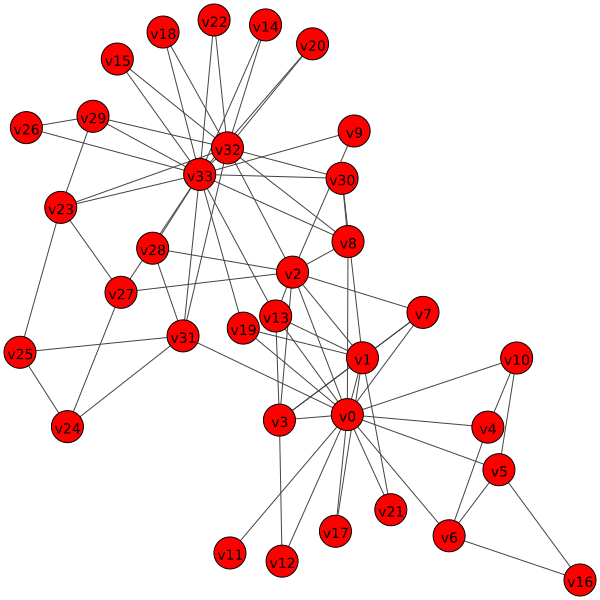

In [3]:
adj = matrix.todense()
G = igraph.Graph.Adjacency(adj > 0).as_undirected()
n = len(G.vs)
m = len(G.es)
G.vs["label"] = [f"v{i}" for i in range(n)]
print(f"Vertices: {n}, Edges: {m}")

igraph.plot(G, vertex_size=32, bbox=(600, 600))

## First simulation

Vertex v0 will be "patient zero". Iterate through 50 days.

In [42]:
initial_states = [DSState.UNEXPOSED] * n
initial_states[0] = DSState.INFECTED
initial_states[33] = DSState.VACCINATED
initial_states[2] = DSState.VACCINATED
initial_states[8] = DSState.VACCINATED
initial_states[13] = DSState.VACCINATED
nodes = nodes_from_igraph(G, initial_states)
ps = 0.06
pd = 0.08
rng = SimpleRNG(42)
model = SISModel(ps, pd, rng)

In [43]:
for t in range(50):
    propagate(nodes, model)

In [44]:
t = -1

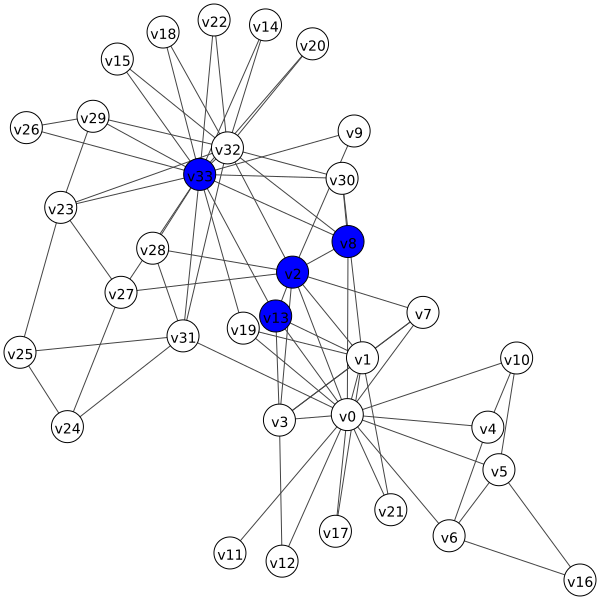

In [81]:
t += 1
colors = colors_from_nodes(nodes, t)
igraph.plot(G, bbox=(600, 600), vertex_color=colors, vertex_size=32)

In [82]:
x = [1, 2, 3]
print(x.index(4))

ValueError: 4 is not in list

In [85]:
nd = 6
f"{x[0]:0{nd}d}"

'000001'

In [86]:
x[:-1]

[1, 2]

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../karate-test-00.csv")
df.head()

,graph,patient0,patient0_cent,rounds,strategy,centrality,model,ps,pd,seed,...,infected_090,infected_091,infected_092,infected_093,infected_094,infected_095,infected_096,infected_097,infected_098,infected_099
0,karate,0,0.568485,100,recursive,spread,SIS,0.05,0.05,42,...,0,0,0,0,0,0,0,0,0,0
1,karate,0,0.568485,100,recursive,spread,SIS,0.05,0.05,42,...,0,0,0,0,0,0,0,0,0,0
2,karate,0,0.568485,100,recursive,spread,SIS,0.05,0.05,42,...,0,0,0,0,0,0,0,0,0,0
3,karate,0,0.568485,100,recursive,spread,SIS,0.05,0.05,42,...,0,0,0,0,0,0,0,0,0,0
4,karate,0,0.568485,100,recursive,spread,SIS,0.05,0.05,42,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df33 = df[df["patient0"] == 33].iloc[:, 11:]
df16 = df[df["patient0"] == 16].iloc[:, 11:]

In [14]:
df33_avg = df33.mean(axis=0)
df16_avg = df16.mean(axis=0)

In [15]:
type(df33_avg)

pandas.core.series.Series

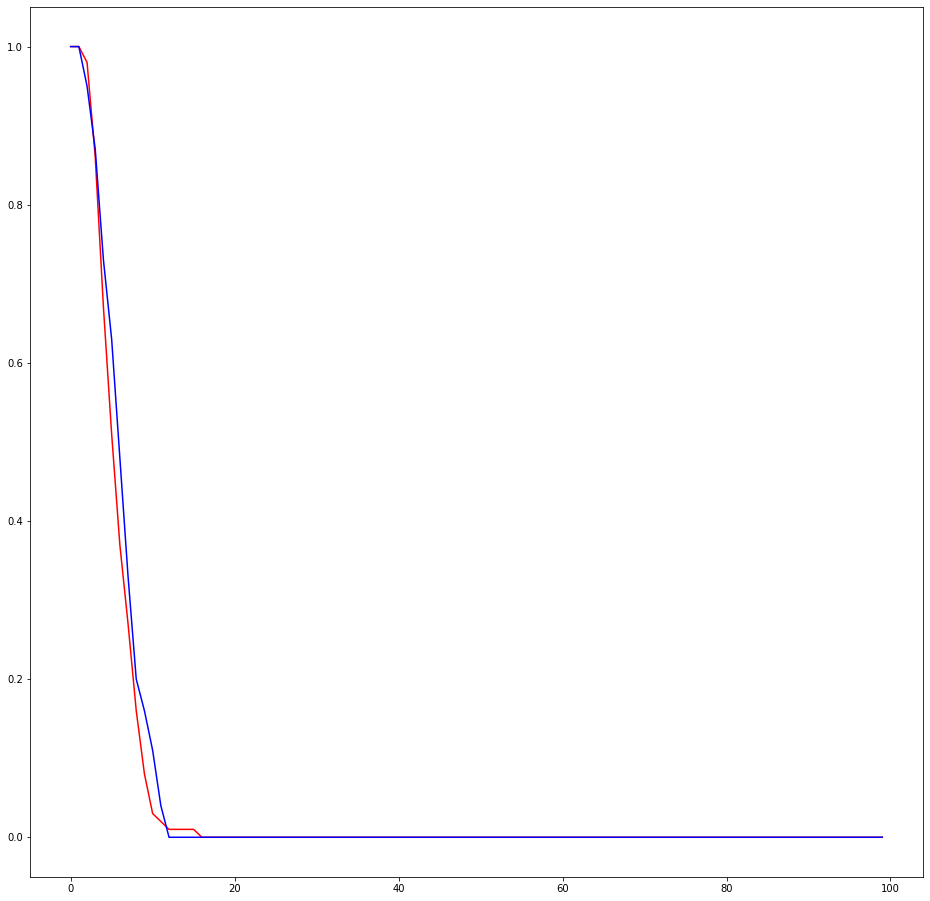

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
ax.plot(list(range(100)), df33_avg, color="red")
ax.plot(list(range(100)), df16_avg, color="blue")
plt.show()

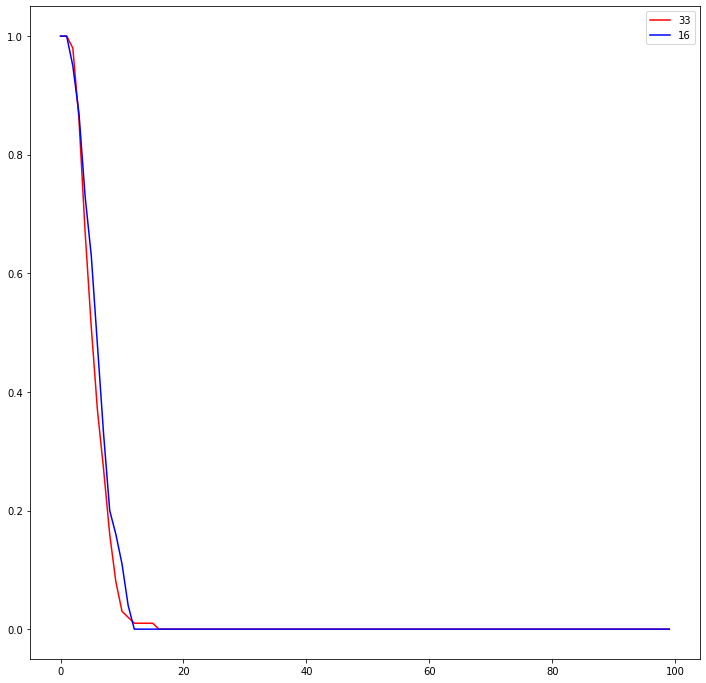

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(list(range(100)), df[df["patient0"] == 33].iloc[:, 11:].mean(axis=0), color="red", label="33")
ax.plot(list(range(100)), df[df["patient0"] == 16].iloc[:, 11:].mean(axis=0), color="blue", label="16")
ax.legend()
plt.show()